# Introduction

We estimate the size of the error in merger time due to waveforms with different start frequencies.

I'm wondering if this is a source of error that hasn't really been thought about before and if we should worry about it or not.

In order to estimate this error we will take an NR simulation and built hybrids. The hybrids will all start at the same initial frequency but they will have different hybridisation windows. This simulates building hybrids for the same BBH system but with NR simulations of different lengths.

Then we shall align the hybrids at early times with respect to a reference hybrid and compute the distribution of merger times with respect to the reference hybrid with will, by definition, be aligned such that the peak of the $\sum |h_{\ell, m}| = 0$.

In [82]:
import utils
import numpy as np
import pandas as pd
import copy
import sxs

import prim.hybrid
from prim import spliced_pn
from prim.waveform import Waveform
from prim.waveform_generator import generate_waveform

In [83]:
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = True

# load SXS waveform

In [84]:
df = sxs.load("simulations").dataframe

In [85]:
df['reference_mass_ratio_rounded'] = df['reference_mass_ratio'].round(3)
df['reference_chi_eff_rounded'] = df['reference_chi_eff'].round(2)
df['reference_dimensionless_spin1z'] = df['reference_dimensionless_spin1'].apply(lambda x: x[2])
df['reference_dimensionless_spin2z'] = df['reference_dimensionless_spin2'].apply(lambda x: x[2])

df['reference_dimensionless_spin1z_rounded'] = df['reference_dimensionless_spin1z'].round(2)
df['reference_dimensionless_spin2z_rounded'] = df['reference_dimensionless_spin2z'].round(2)

In [86]:
# get non-precessing simulations, non-eccentric and non-deprecated simulations
# and BBH
mask = \
    (df['reference_chi1_perp'] < 0.001) \
    & (df['reference_chi2_perp'] < 0.001) \
    & (df['reference_eccentricity'] < 0.001) \
    & (df['deprecated'] == False) \
    & (df['object_types'] == 'BHBH') \
    & (df['reference_mass_ratio_rounded'] == 1) \
    & (df['reference_dimensionless_spin1z_rounded'] == 0) \
    & (df['reference_dimensionless_spin2z_rounded'] == 0)

print(df.shape[0])
print(mask.sum())

2778
14


In [87]:
cols=['reference_mass_ratio', 'reference_chi_eff_rounded', 'reference_dimensionless_spin1z_rounded', 'reference_dimensionless_spin2z_rounded', 'number_of_orbits']
df[mask].sort_values(by=cols)[cols].sort_values(by='number_of_orbits', ascending=False)

reference_mass_ratio  reference_chi_eff_rounded  \
SXS:BBH:1154                   1.0                        0.0   
SXS:BBH:2326                   1.0                        0.0   
SXS:BBH:3624                   1.0                        0.0   
SXS:BBH:2325                   1.0                        0.0   
SXS:BBH:2376                   1.0                        0.0   
SXS:BBH:2375                   1.0                        0.0   
SXS:BBH:2377                   1.0                        0.0   
SXS:BBH:2378                   1.0                        0.0   
SXS:BBH:2496                   1.0                        0.0   
SXS:BBH:0389                   1.0                       -0.0   
SXS:BBH:3864                   1.0                       -0.0   
SXS:BBH:3634                   1.0                        0.0   
SXS:BBH:3633                   1.0                        0.0   
SXS:BBH:3632                   1.0                        0.0   

              reference_dimensionless_spin1z_rounded  \
SXS:BBH:1154                                     0.0   
SXS:BBH:2326                                     0.0   
SXS:BBH:3624                                     0.0   
SXS:BBH:2325                                     0.0   
SXS:BBH:2376                                     0.0   
SXS:BBH:2375                                     0.0   
SXS:BBH:2377                                     0.0   
SXS:BBH:2378                                     0.0   
SXS:BBH:2496                                     0.0   
SXS:BBH:0389                                    -0.0   
SXS:BBH:3864                                    -0.0   
SXS:BBH:3634                                     0.0   
SXS:BBH:3633                                     0.0   
SXS:BBH:3632                                     0.0   

              reference_dimensionless_spin2z_rounded  number_of_orbits  
SXS:BBH:1154                                     0.0         40.651163  
SXS:BBH:2326                                     0.0         32.207261  
SXS:BBH:3624                                     0.0         27.976852  
SXS:BBH:2325                                     0.0         27.964547  
SXS:BBH:2376                                     0.0         27.959775  
SXS:BBH:2375                                     0.0         27.959523  
SXS:BBH:2377                                     0.0         27.957669  
SXS:BBH:2378                                     0.0         27.955793  
SXS:BBH:2496                                     0.0         20.854820  
SXS:BBH:0389                                    -0.0         18.632497  
SXS:BBH:3864                                    -0.0         18.436876  
SXS:BBH:3634                                    -0.0          9.629791  
SXS:BBH:3633                                     0.0          9.499828  
SXS:BBH:3632                                     0.0          9.499769

In [88]:
# metadata, wfs = utils.sxs_load_all_levels('SXS:BBH:1154')
metadata, wfs = utils.sxs_load_all_levels('SXS:BBH:3864')

# metadata, wfs = utils.sxs_load_all_levels('SXS:BBH:3976')
# metadata, wfs = utils.sxs_load_all_levels('SXS:BBH:2471')

Simulation_v2("SXS:BBH:3864v2.0/Lev1")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation
Simulation_v2("SXS:BBH:3864v2.0/Lev2")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation
Simulation_v2("SXS:BBH:3864v2.0/Lev3")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation
Simulation_v2("SXS:BBH:3864v2.0/Lev4")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation
Simulation_v2("SXS:BBH:3864v2.0/Lev5")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation
Simulation_v2("SXS:BBH:3864v2.0/Lev6")
# n_orbits=18.4 q=1 chi1=[-3.13e-09, 5.77e-10, -1.08e-05] chi2=[4.3e-09, -5.33e-09, -1.06e-05] e=0.000976 simulation


In [89]:
reference_sim, non_reference_sims = utils.get_reference_and_other(metadata)
reference_sim, non_reference_sims

('SXS:BBH:3864/Lev6',
 ['SXS:BBH:3864/Lev1',
  'SXS:BBH:3864/Lev2',
  'SXS:BBH:3864/Lev3',
  'SXS:BBH:3864/Lev4',
  'SXS:BBH:3864/Lev5'])

In [90]:
wfs.keys()

dict_keys(['SXS:BBH:3864/Lev1', 'SXS:BBH:3864/Lev2', 'SXS:BBH:3864/Lev3', 'SXS:BBH:3864/Lev4', 'SXS:BBH:3864/Lev5', 'SXS:BBH:3864/Lev6'])

In [91]:
# modes = [(2, 2), (2, 1), (3, 3),(3,2),(4, 4),(4,3),(5,5),(5,4)]
modes = [(2,2), (3,2), (4, 4), (5,4)]
# modes = [(2,2)]
wf_nr = utils.convert_sxs_to_prim_waveform(wfs[reference_sim], modes=modes)

In [92]:
wf_nr.times[1]-wf_nr.times[0]

0.9478804413238322

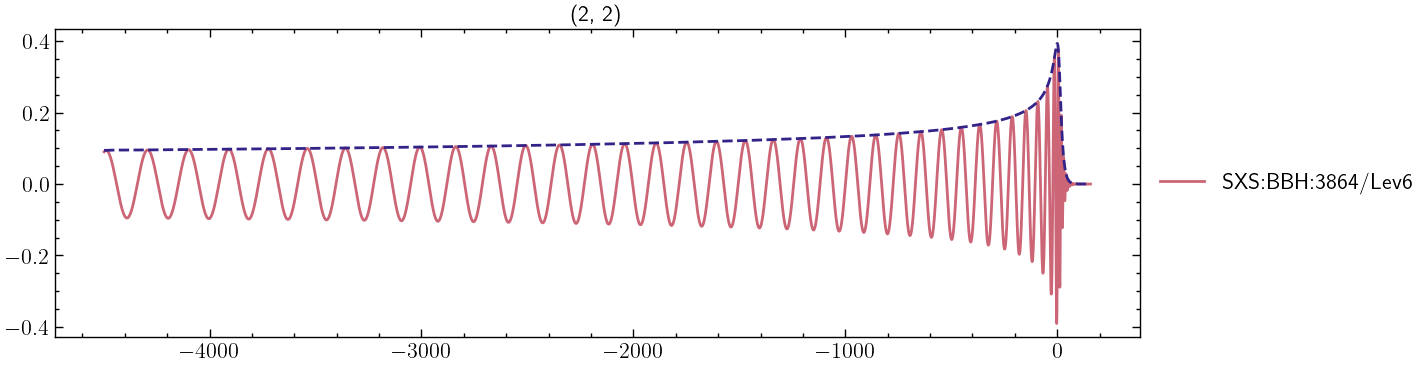

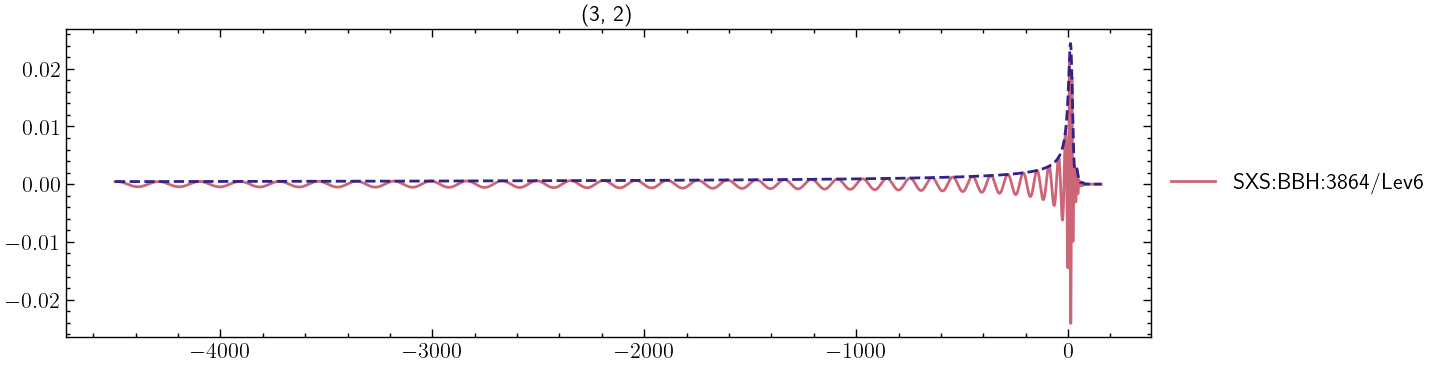

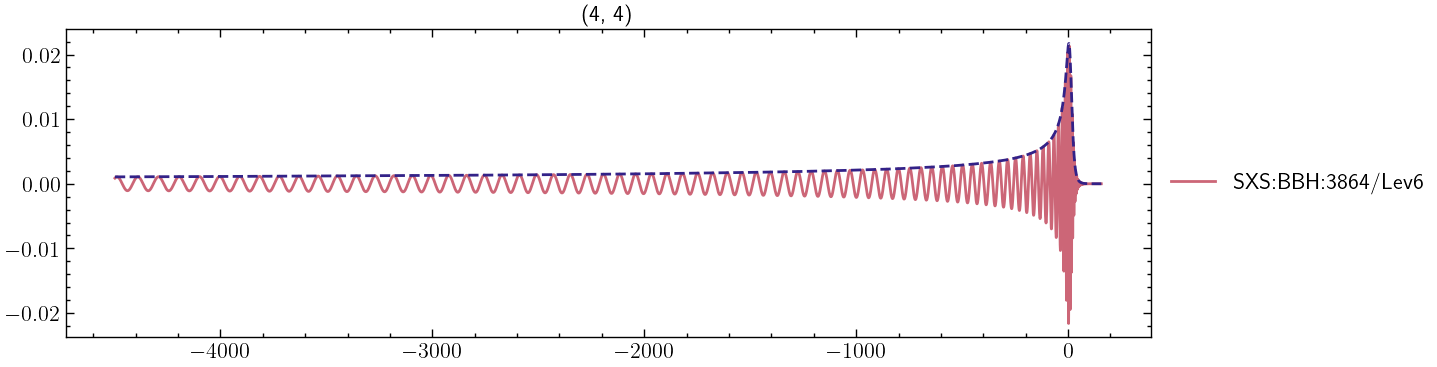

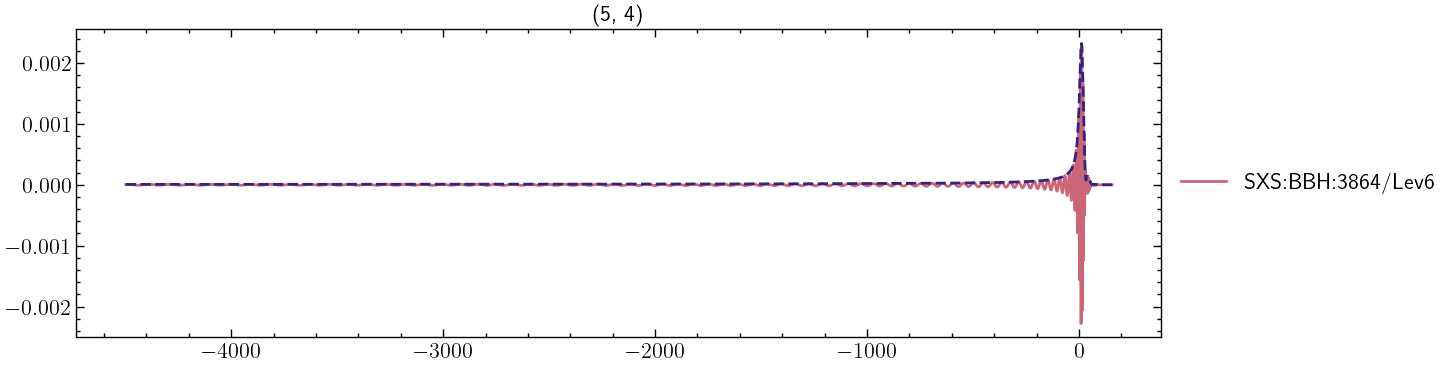

In [93]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    plt.plot(wf_nr.times, wf_nr.hlms[mode].real, label=reference_sim)
    plt.plot(wf_nr.times, wf_nr.amplitudes[mode].real, ls='--')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2)
    # plt.xlim(-100, 100)
    plt.title(mode)

# hybridise

We hybridise the same NR waveform with the same approximant at a fixed start frequency but varying the hybridisation windown to be later and later

In [94]:
# n_cycles_before_window_list = [0, 10, 30, 50, 65]
n_cycles_before_window_list = [0, 10, 20]

The plot below shows the different hybridisation windows

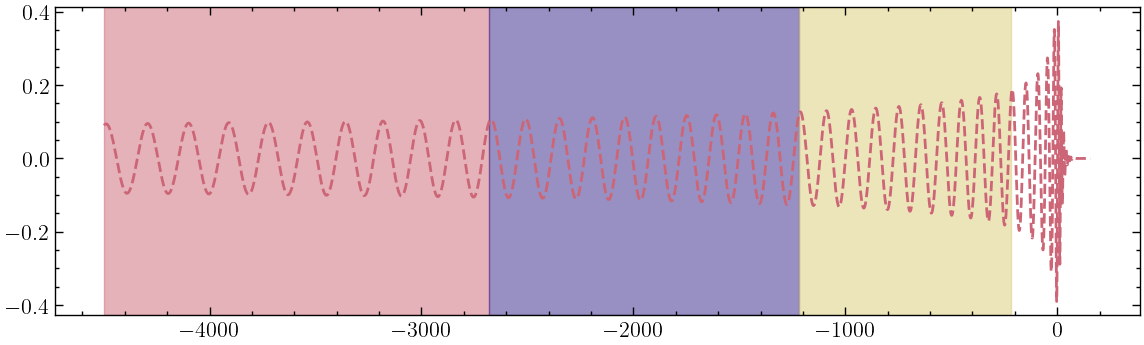

In [95]:
plt.figure(figsize=(14, 4))
plt.plot(wf_nr.times, wf_nr.hlms[2,2].real, ls='--')
for i in range(len(n_cycles_before_window_list)):
    n_before = n_cycles_before_window_list[i]
    win1, win2 = prim.hybrid.get_window_times(wf_nr, n_cycles_before_window=n_before, n_cycles_in_window=10)
    plt.axvspan(win1, win2, color=f"C{i}", alpha=0.5)

In [96]:
%%time
M = 20
f_min_left = 10
approximant = "SEOBNRv5HM"
# approximant = "IMRPhenomTHM"
# approximant = "SEOBNRv4HM_PA"
# approximant = "SpinTaylorT4"
fit_modes = modes
n_cycles_in_window = 10
n_tries=10
# deltaT = 1/4096*2
# deltaT = 1/4096
deltaT = 1/4096/2

wf_hybrids = {}
hybrids_metadatas = {}
for i in range(len(n_cycles_before_window_list)):
    n_before = n_cycles_before_window_list[i]
    tag = f"n_before_{n_before}"
    print(f"{tag = }")
    wf_left = utils.get_left_waveform_from_metadata(metadata[reference_sim], M, f_min_left, fit_modes, approximant, deltaT)
    print("fitting hybrid")
    wf_, hybrids_metadatas[tag] = utils.hybridise(
        wf_left, wf_nr, fit_modes=fit_modes,
        n_cycles_before_window=n_before, n_cycles_in_window=n_cycles_in_window,
        time_shift_guess=0, n_tries=n_tries, return_metadata=True
    )

    # time shift peak
    # only really need to do this for the reference hybrid
    t0_wf_, _ = (
        wf_.compute_amplitude().compute_phase().compute_frequency().compute_time_of_peak()
    )
    wf_.apply_time_shift(-t0_wf_)
    wf_.compute_amplitude().compute_phase().compute_frequency()
    wf_hybrids[tag] = copy.deepcopy(wf_)
    

print('done')

tag = 'n_before_0'
fitting hybrid
tag = 'n_before_10'
fitting hybrid
tag = 'n_before_20'
fitting hybrid
done
CPU times: user 24.3 s, sys: 2.16 s, total: 26.5 s
Wall time: 26.3 s


In [97]:
for k in wf_hybrids.keys():
    print(k, wf_hybrids[k].compute_time_of_peak())

n_before_0 (0.0, 1263559)
n_before_10 (0.0, 1263559)
n_before_20 (0.0, 1263559)


The `utils.hybridise` should return hybrids that are aligned with the wf_nr waveform

Now we pick one hybrid to be the reference and we align the other hybrids with it.

We pick the first one because we assume this is the hybrid that was aligned the earliest.

In [98]:
reference_hybrid = list(wf_hybrids.keys())[0]
reference_hybrid

'n_before_0'

In [99]:
other_hybrids = list(set(list(wf_hybrids.keys())) - set([reference_hybrid]))
other_hybrids = sorted(other_hybrids)
other_hybrids

['n_before_10', 'n_before_20']

In [100]:
wf_hybrids[reference_hybrid].times[1] - wf_hybrids[reference_hybrid].times[0]

0.30979224166367203

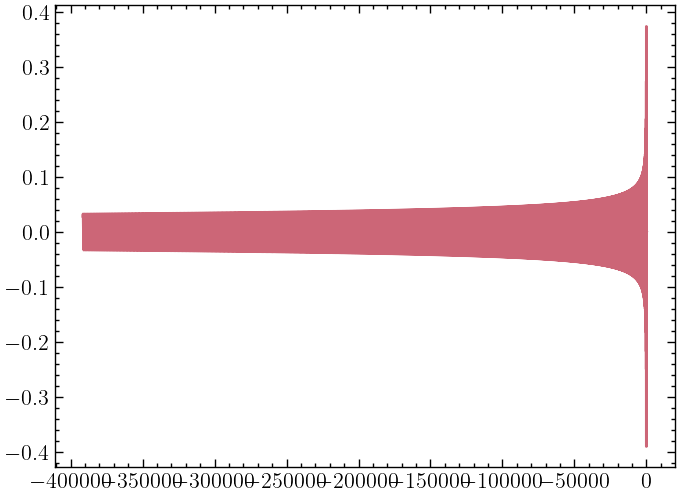

In [101]:
plt.figure()
plt.plot(wf_hybrids[reference_hybrid].times, wf_hybrids[reference_hybrid].hlms[2,2].real)

In [102]:
win1, win2 = prim.hybrid.get_window_times(wf_hybrids[reference_hybrid], n_cycles_before_window=0, n_cycles_in_window=20)
win1, win2

(-391440.77508430777, -371336.18797706044)

In [103]:
# %%time
# wf_hybrids_aligned = {}
# # don't use all of the right waveform to make the alignement code faster
# wf_right = copy.deepcopy(wf_hybrids[reference_hybrid]).mask(win1, win2)
# for k in wf_hybrids.keys():
#     print(k)
#     wf_hybrids_aligned[k] = utils.align_waveforms(
#         wf_hybrids[k], wf_right, fit_modes, n_cycles_before_window=0, n_cycles_in_window=10, time_shift_guess=0, interpolation_params=None, n_tries=10
#     )

In [104]:
%%time
wf_hybrids_aligned = {}
# don't use all of the right waveform to make the alignement code faster
wf_right = copy.deepcopy(wf_hybrids[reference_hybrid]).mask(win1, win2)
wf_hybrids_aligned[reference_hybrid] = copy.deepcopy(wf_hybrids[reference_hybrid])
# for k in wf_hybrids.keys():
for k in other_hybrids:
    print(k)
    wf_hybrids_aligned[k] = utils.align_waveforms(
        wf_hybrids[k], wf_right, fit_modes, n_cycles_before_window=0, n_cycles_in_window=10, time_shift_guess=0, interpolation_params=None, n_tries=10
    )

n_before_10
n_before_20
CPU times: user 4.3 s, sys: 830 ms, total: 5.13 s
Wall time: 5.26 s


In [105]:
wf_hybrids_aligned

{'n_before_0': <prim.waveform.Waveform at 0x15a187490>,
 'n_before_10': <prim.waveform.Waveform at 0x177d68220>,
 'n_before_20': <prim.waveform.Waveform at 0x177d6b7c0>}

In [106]:
wf_nr.compute_time_of_peak()

(0.0, 13625)

In [107]:
for k in [reference_hybrid]:
    print(k, wf_hybrids_aligned[k].compute_time_of_peak())

n_before_0 (0.0, 1263559)


In [108]:
for k in other_hybrids:
    print(k, wf_hybrids_aligned[k].compute_time_of_peak())

n_before_10 (-3.726642331853842e-07, 1263559)
n_before_20 (3.019471556673066e-07, 1263559)


In [109]:
# f_min 20
# n_before_10 (-0.30979224169545655, 195712)
# n_before_20 (5.886052592161843, 195732)

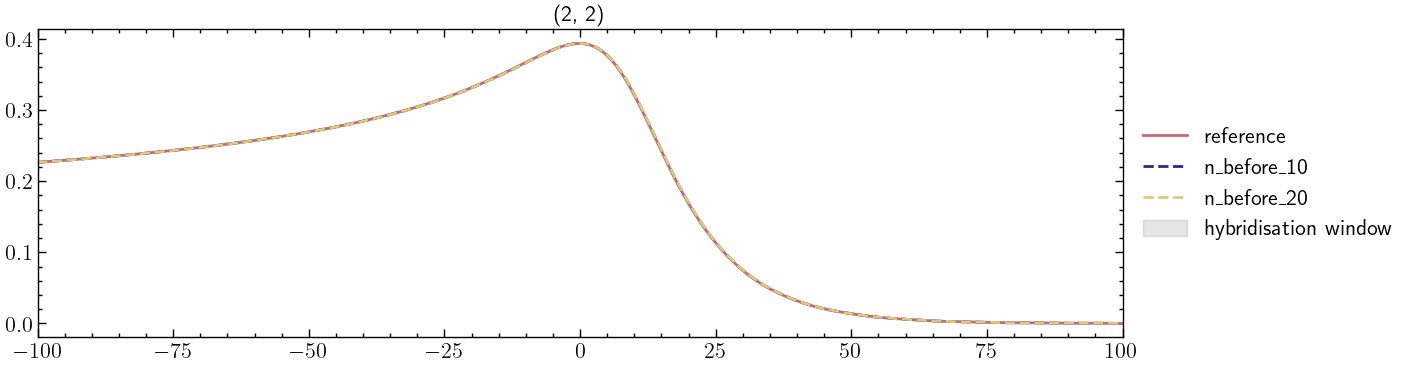

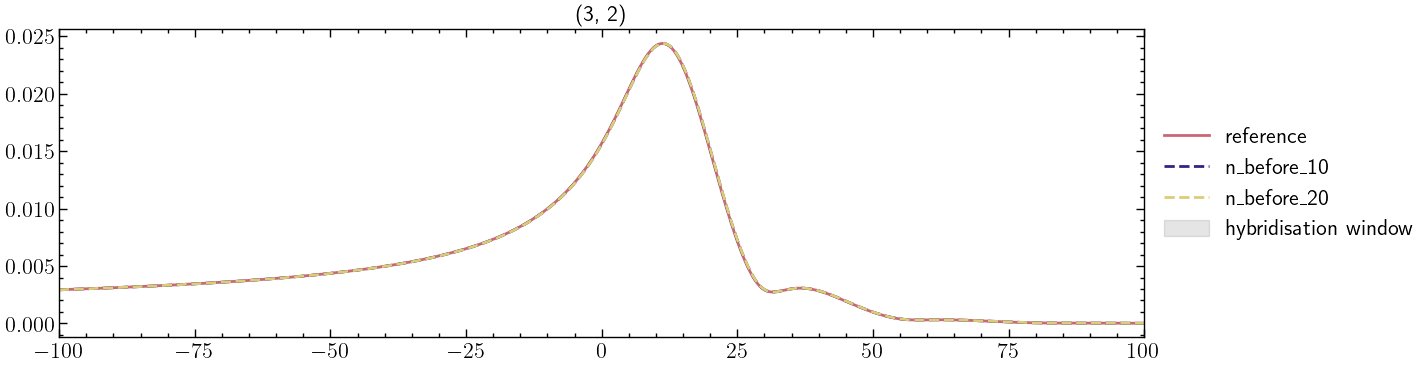

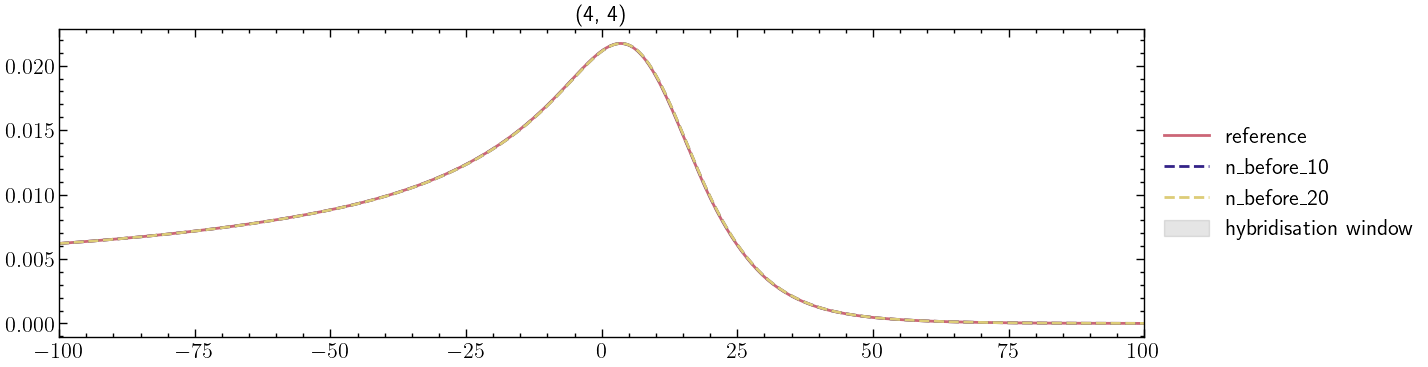

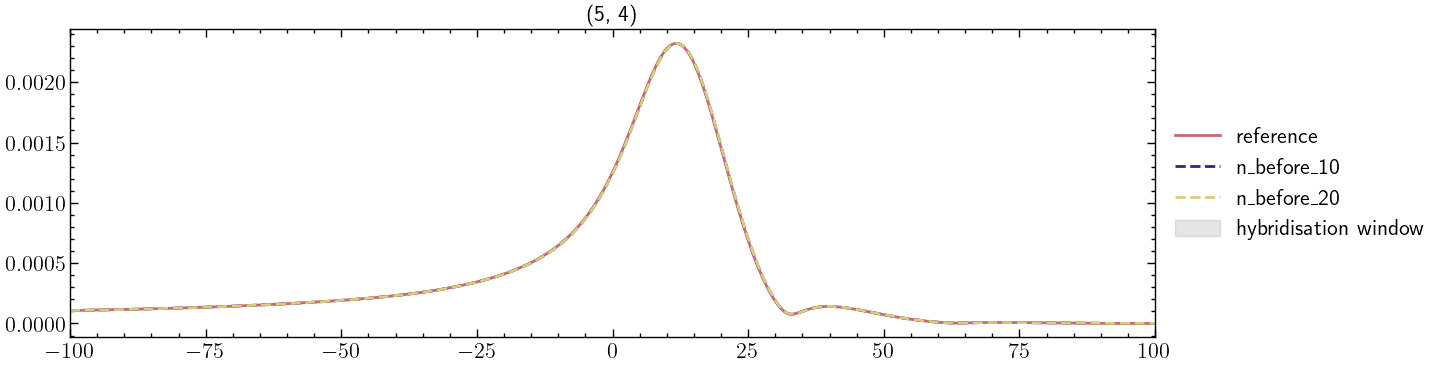

In [110]:
for mode in modes:
    plt.figure(figsize=(14, 4))
    # plt.figure()
    plt.plot(wf_hybrids_aligned[reference_hybrid].times, wf_hybrids_aligned[reference_hybrid].amplitudes[mode].real, label='reference')
    for k in other_hybrids:
        plt.plot(wf_hybrids_aligned[k].times, wf_hybrids_aligned[k].amplitudes[mode].real, ls='--', label=k)
    plt.xlim(-100, 100)
    # plt.xlim(-5000, 100)
    plt.axvspan(win1, win2, color="k", alpha=0.1, label="hybridisation window")
    plt.title(mode)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()